In [1]:
#pip install fbprophet


Set Up the Data for Prophet
Train the Prophet Model
Make Predictions
Evaluate the Model
Visualize the Results

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Set Up the Data for Prophet
data = pd.read_csv("incoming_daily_till2023may_interpolated.csv")
data_prophet = data.rename(columns={'date': 'ds', 'volume': 'y'})
# Ensure 'ds' is in datetime format without timezone
data_prophet['ds'] = pd.to_datetime(data_prophet['ds']).dt.tz_localize(None)

In [3]:
# Split the data into training and test sets (e.g., 80-20 split)
train_size = int(0.8 * len(data_prophet))
train_data_prophet = data_prophet.iloc[:train_size]
test_data_prophet = data_prophet.iloc[train_size:]

In [4]:

# 2. Train the Prophet Model
model = Prophet( weekly_seasonality=True, daily_seasonality=True)
model.fit(train_data_prophet)

23:27:37 - cmdstanpy - INFO - Chain [1] start processing
23:27:37 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# 3. Make Predictions
future = model.make_future_dataframe(periods=len(test_data_prophet))
forecast = model.predict(future)

In [6]:
# 4. Evaluate the Model
predicted = forecast['yhat'][train_size:]
actual = test_data_prophet['y'].values

# Calculate RMSE
rmse = np.sqrt(((predicted - actual) ** 2).mean())
# Calculate MAE
mae = np.abs(predicted - actual).mean()
# Calculate MAPE
mape = (np.abs((actual - predicted) / actual)).mean() * 100
# Calculate Theil's U2
numerator = np.sqrt(np.sum((predicted - actual)**2) / len(actual))
denominator = np.sqrt((np.sum(actual**2) + np.sum(predicted**2)) / (2 * len(actual)))
theils_u2 = numerator / denominator

print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}%, Theil's U2: {theils_u2}")

RMSE: 432.9018118086484, MAE: 362.498082188185, MAPE: 346.40248954344486%, Theil's U2: 0.3979337332564023


  0%|          | 0/1 [00:00<?, ?it/s]

23:27:37 - cmdstanpy - INFO - Chain [1] start processing
23:27:37 - cmdstanpy - INFO - Chain [1] done processing


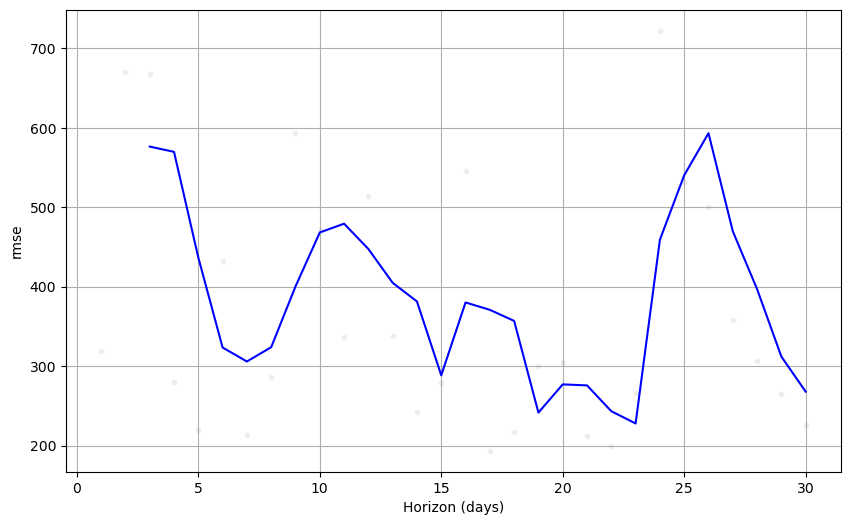

RMSE for Each Horizon:
    horizon        rmse
0   3 days  576.286390
1   4 days  569.662329
2   5 days  436.662208
3   6 days  323.363649
4   7 days  305.772315
5   8 days  323.770490
6   9 days  400.205061
7  10 days  468.172925
8  11 days  479.230566
9  12 days  447.384911
10 13 days  404.814988
11 14 days  381.351941
12 15 days  288.394617
13 16 days  380.094135
14 17 days  370.788704
15 18 days  356.891665
16 19 days  241.433444
17 20 days  276.961668
18 21 days  275.677569
19 22 days  243.177252
20 23 days  227.751984
21 24 days  459.048969
22 25 days  540.217489
23 26 days  593.142955
24 27 days  469.700732
25 28 days  396.873730
26 29 days  311.887020
27 30 days  267.831598

Average RMSE over all horizons: 386.30540378438246


In [7]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model, initial='670 days', period='30 days', horizon='30 days')

# Compute performance metrics
df_perf = performance_metrics(df_cv)

# Visualize performance metrics
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

# RMSE for each horizon
rmse_each_horizon = df_perf[['horizon', 'rmse']]

# Mean RMSE over all horizons
mean_rmse = df_perf['rmse'].mean()

print("RMSE for Each Horizon:\n", rmse_each_horizon)
print("\nAverage RMSE over all horizons:", mean_rmse)




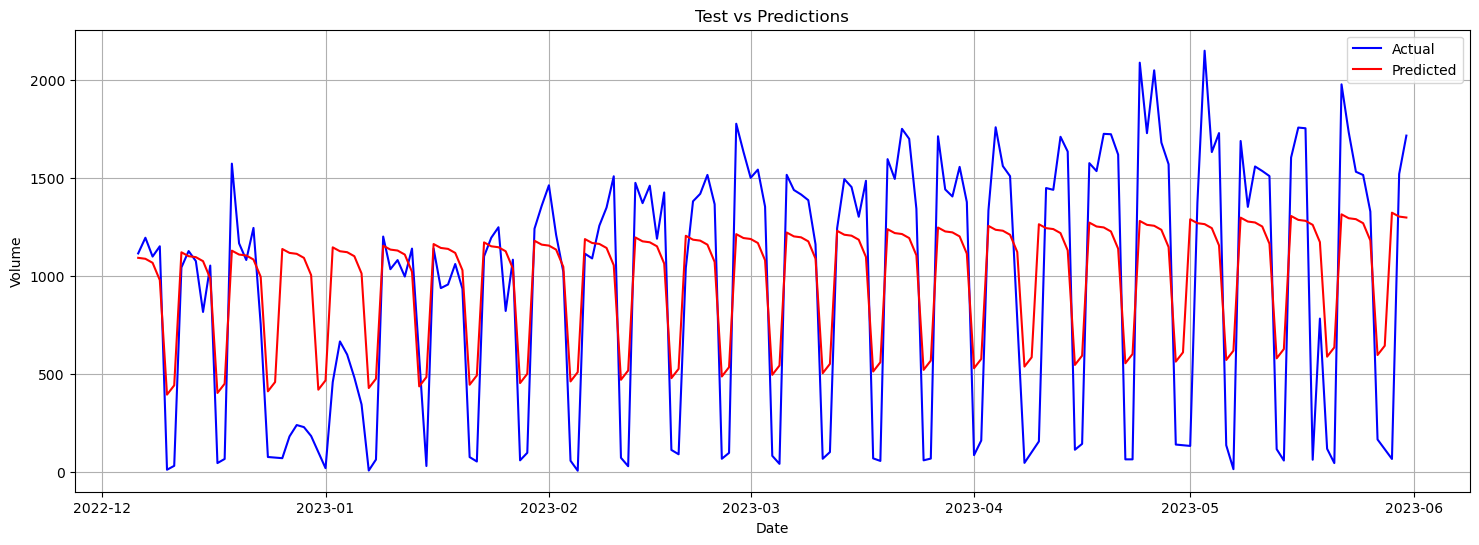

In [8]:
# 5. Visualize the Results
# Test vs Predictions
plt.figure(figsize=(18, 6))
plt.plot(test_data_prophet['ds'], actual, label="Actual", color='blue')
plt.plot(test_data_prophet['ds'], predicted, label="Predicted", color='red')
plt.title('Test vs Predictions')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

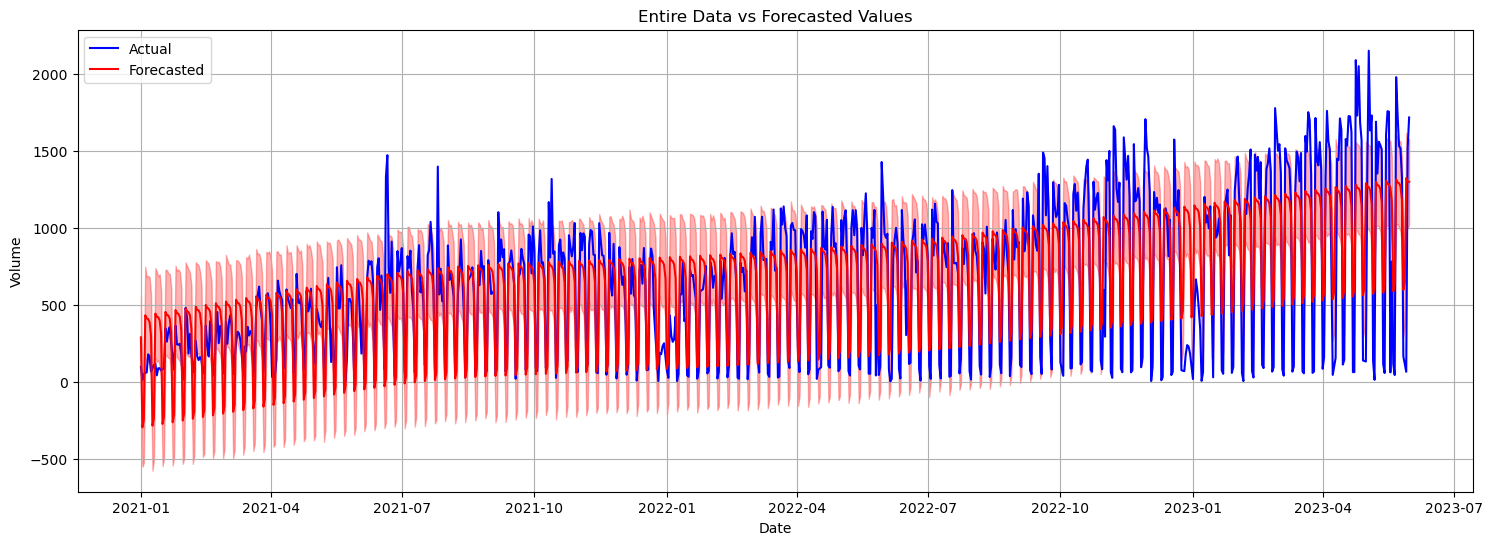

In [9]:
# Entire data vs Forecasted values
plt.figure(figsize=(18, 6))
plt.plot(data_prophet['ds'], data_prophet['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='r', alpha=0.3)
plt.title('Entire Data vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

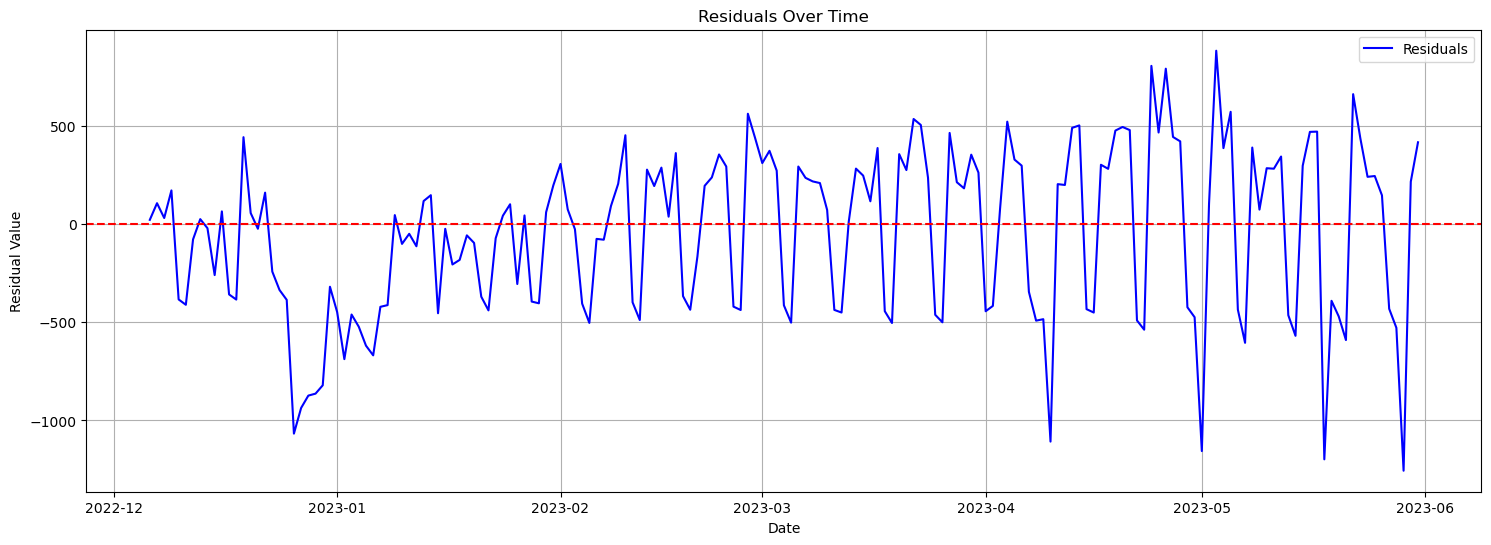

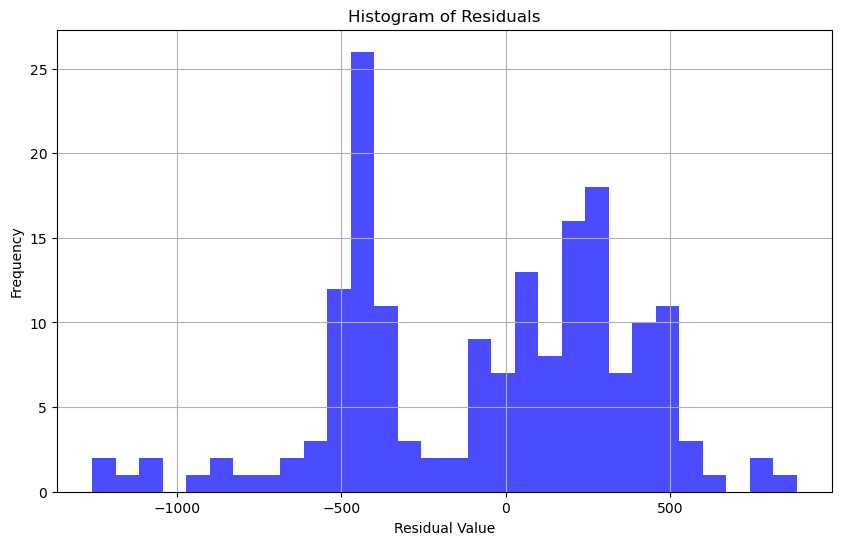

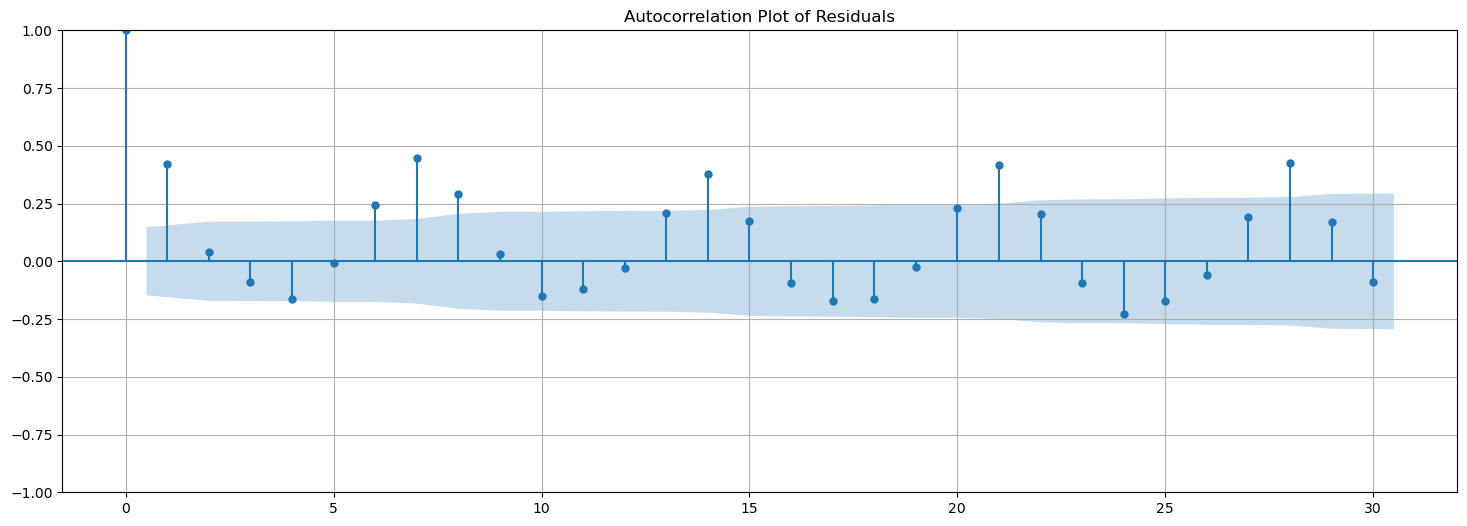

In [10]:
import statsmodels.api as sm

# Calculate residuals
residuals = actual - predicted

# 1. Residuals Plot
plt.figure(figsize=(18, 6))
plt.plot(test_data_prophet['ds'], residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.grid(True)
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Autocorrelation Plot of Residuals
fig, ax = plt.subplots(figsize=(18, 6))
sm.graphics.tsa.plot_acf(residuals, ax=ax, lags=30)
plt.title('Autocorrelation Plot of Residuals')
plt.grid(True)
plt.show()


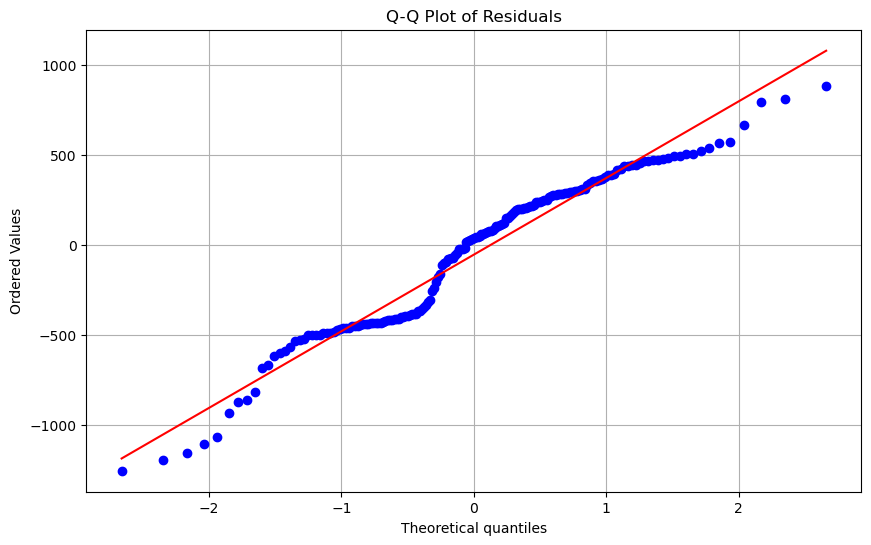

In [11]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()


In [12]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

AttributeError: 'Prophet' object has no attribute 'plot_diagnostics'

In [ ]:
# Train the Prophet model on the entire dataset
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(data_prophet)

# Create a dataframe that extends 30 days into the future after the dataset ends
future = model.make_future_dataframe(periods=30)

# Predict using the trained Prophet model
forecast_30_days = model.predict(future)

# Extract the forecasted values for the 30 days after the dataset ends
forecasted_values = forecast_30_days['yhat'][-30:]
forecast_dates = forecast_30_days['ds'][-30:]

# Visualize the forecast
plt.figure(figsize=(18, 6))
plt.plot(data_prophet['ds'], data_prophet['y'], label='Historical Data', color='blue')
plt.plot(forecast_dates, forecasted_values, label='30-Day Forecast', color='red', linestyle='--')
plt.fill_between(forecast_dates, forecast_30_days['yhat_lower'][-30:], forecast_30_days['yhat_upper'][-30:], color='r', alpha=0.3)
plt.title('Forecast for 30 Days After the Dataset Ends')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values with dates
forecast_data = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Volume': forecasted_values
})
print(forecast_data)
